<a href="https://colab.research.google.com/github/MarkVil987/Prueba-Marcos_Vilchez/blob/main/VA__Mejora_de_imagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MEJORA DE 4 IMAGENES
## Por: Juan Marcos Vilchez Canchari.

Saving 1251.png to 1251.png


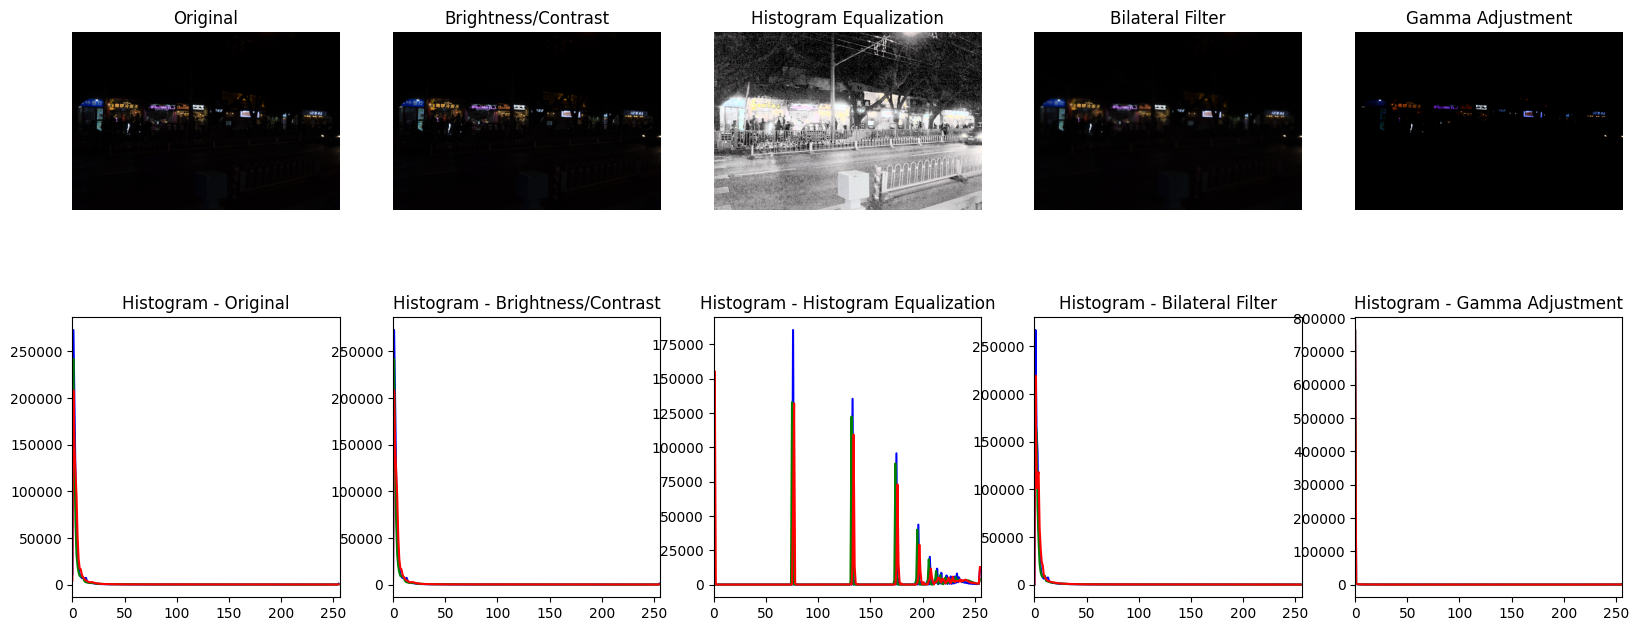

In [17]:
# Importar las librerías necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from IPython.display import display
from PIL import Image

# Función para calcular y mostrar histogramas
def plot_histogram(image, title):
    plt.figure()
    plt.title(title)
    plt.xlabel('Bins')
    plt.ylabel('# of Pixels')
    colors = ('b', 'g', 'r')
    for (i, col) in enumerate(colors):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
        plt.xlim([0, 256])
    plt.show()

# Función para mostrar imágenes en Colab en una fila
def show_images(images, titles):
    assert(len(images) == len(titles))
    n = len(images)
    fig, axs = plt.subplots(2, n, figsize=(20, 8))

    for i in range(n):
        axs[0, i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        axs[0, i].set_title(titles[i])
        axs[0, i].axis('off')

        # Mostrar el histograma en la fila inferior
        image = images[i]
        if len(image.shape) == 3 and image.shape[-1] == 3:
            for ch, color in enumerate(['b', 'g', 'r']):
                hist = cv2.calcHist([image], [ch], None, [256], [0, 256])
                axs[1, i].plot(hist, color=color)
        axs[1, i].set_xlim([0, 256])
        axs[1, i].set_title(f'Histogram - {titles[i]}')
    plt.show()

# Función para ajustar brillo y contraste
def apply_brightness_contrast(input_img, brightness=255, contrast=127):
    brightness -= 255
    contrast = contrast * 131 / 127 - 131

    img = input_img.copy()
    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow) / 255
        gamma_b = shadow
        img = cv2.addWeighted(img, alpha_b, img, 0, gamma_b)

    if contrast != 0:
        f = 131 * (contrast + 127) / (127 * (131 - contrast))
        alpha_c = f
        gamma_c = 127 * (1 - f)
        img = cv2.addWeighted(img, alpha_c, img, 0, gamma_c)

    return img

# Función para aplicar ecualización del histograma
def apply_hist_eq(input_img):
    img_yuv = cv2.cvtColor(input_img, cv2.COLOR_BGR2YUV)
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    hist_eq_image = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
    return hist_eq_image

# Función para aplicar filtro bilateral
def apply_bilateral_filter(input_img):
    bilateral_image = cv2.bilateralFilter(input_img, 12, 150, 150)
    return bilateral_image

# Función para ajustar gamma
def adjust_gamma(input_img, gamma=0.3):
    invGamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** invGamma * 255 for i in range(256)]).astype("uint8")
    gamma_image = cv2.LUT(input_img, table)
    return gamma_image

# Subir y procesar la imagen
uploaded = files.upload()
for filename in uploaded.keys():
    img = cv2.imread(filename)

    processed_images = []
    titles = []

    processed_images.append(img)
    titles.append("Original")

    bright_contrast_image = apply_brightness_contrast(img)
    hist_eq_image = apply_hist_eq(img)
    bilateral_image = apply_bilateral_filter(img)
    gamma_image = adjust_gamma(img)

    processed_images.extend([bright_contrast_image, hist_eq_image, bilateral_image, gamma_image])
    titles.extend(["Brightness/Contrast", "Histogram Equalization", "Bilateral Filter", "Gamma Adjustment"])

# Mostrar las imágenes originales y mejoradas en paralelo con sus histogramas
show_images(processed_images, titles)

Saving 1472.png to 1472.png


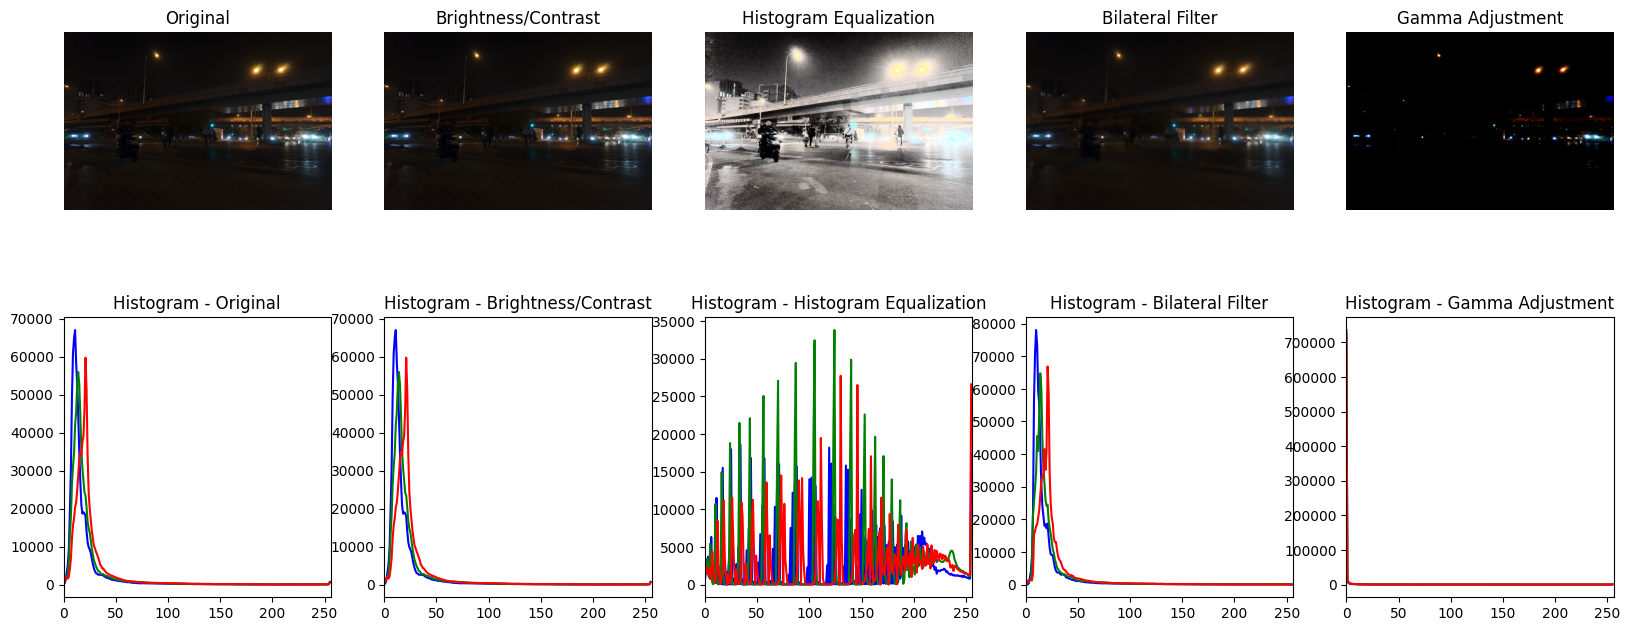

In [18]:
# Importar las librerías necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from IPython.display import display
from PIL import Image

# Función para calcular y mostrar histogramas
def plot_histogram(image, title):
    plt.figure()
    plt.title(title)
    plt.xlabel('Bins')
    plt.ylabel('# of Pixels')
    colors = ('b', 'g', 'r')
    for (i, col) in enumerate(colors):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
        plt.xlim([0, 256])
    plt.show()

# Función para mostrar imágenes en Colab en una fila
def show_images(images, titles):
    assert(len(images) == len(titles))
    n = len(images)
    fig, axs = plt.subplots(2, n, figsize=(20, 8))

    for i in range(n):
        axs[0, i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        axs[0, i].set_title(titles[i])
        axs[0, i].axis('off')

        # Mostrar el histograma en la fila inferior
        image = images[i]
        if len(image.shape) == 3 and image.shape[-1] == 3:
            for ch, color in enumerate(['b', 'g', 'r']):
                hist = cv2.calcHist([image], [ch], None, [256], [0, 256])
                axs[1, i].plot(hist, color=color)
        axs[1, i].set_xlim([0, 256])
        axs[1, i].set_title(f'Histogram - {titles[i]}')
    plt.show()

# Función para ajustar brillo y contraste
def apply_brightness_contrast(input_img, brightness=255, contrast=127):
    brightness -= 255
    contrast = contrast * 131 / 127 - 131

    img = input_img.copy()
    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow) / 255
        gamma_b = shadow
        img = cv2.addWeighted(img, alpha_b, img, 0, gamma_b)

    if contrast != 0:
        f = 131 * (contrast + 127) / (127 * (131 - contrast))
        alpha_c = f
        gamma_c = 127 * (1 - f)
        img = cv2.addWeighted(img, alpha_c, img, 0, gamma_c)

    return img

# Función para aplicar ecualización del histograma
def apply_hist_eq(input_img):
    img_yuv = cv2.cvtColor(input_img, cv2.COLOR_BGR2YUV)
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    hist_eq_image = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
    return hist_eq_image

# Función para aplicar filtro bilateral
def apply_bilateral_filter(input_img):
    bilateral_image = cv2.bilateralFilter(input_img, 14, 120, 120)
    return bilateral_image

# Función para ajustar gamma
def adjust_gamma(input_img, gamma=0.3):
    invGamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** invGamma * 255 for i in range(256)]).astype("uint8")
    gamma_image = cv2.LUT(input_img, table)
    return gamma_image

# Subir y procesar la imagen
uploaded = files.upload()
for filename in uploaded.keys():
    img = cv2.imread(filename)

    processed_images = []
    titles = []

    processed_images.append(img)
    titles.append("Original")

    bright_contrast_image = apply_brightness_contrast(img)
    hist_eq_image = apply_hist_eq(img)
    bilateral_image = apply_bilateral_filter(img)
    gamma_image = adjust_gamma(img)

    processed_images.extend([bright_contrast_image, hist_eq_image, bilateral_image, gamma_image])
    titles.extend(["Brightness/Contrast", "Histogram Equalization", "Bilateral Filter", "Gamma Adjustment"])

# Mostrar las imágenes originales y mejoradas en paralelo con sus histogramas
show_images(processed_images, titles)

Saving 1561.png to 1561 (6).png


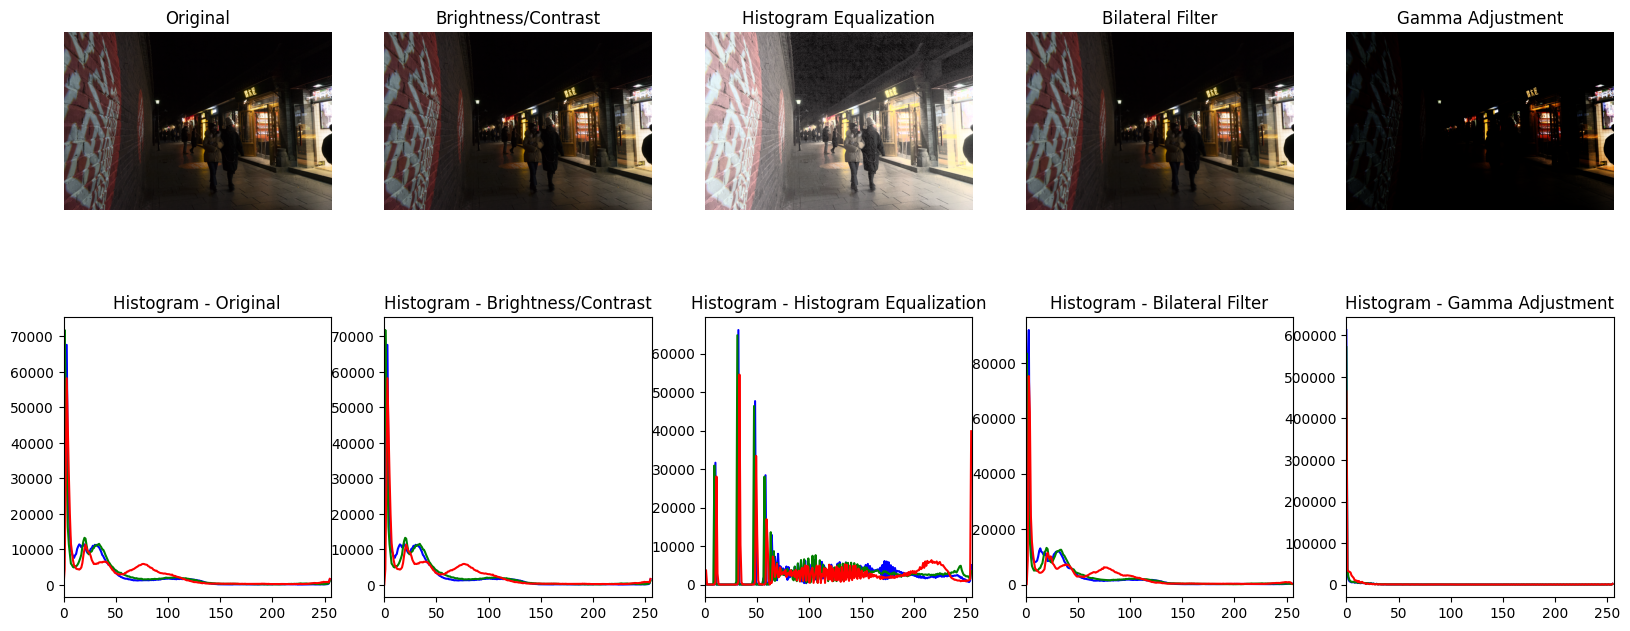

In [19]:
# Importar las librerías necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from IPython.display import display
from PIL import Image

# Función para calcular y mostrar histogramas
def plot_histogram(image, title):
    plt.figure()
    plt.title(title)
    plt.xlabel('Bins')
    plt.ylabel('# of Pixels')
    colors = ('b', 'g', 'r')
    for (i, col) in enumerate(colors):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
        plt.xlim([0, 256])
    plt.show()

# Función para mostrar imágenes en Colab en una fila
def show_images(images, titles):
    assert(len(images) == len(titles))
    n = len(images)
    fig, axs = plt.subplots(2, n, figsize=(20, 8))

    for i in range(n):
        axs[0, i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        axs[0, i].set_title(titles[i])
        axs[0, i].axis('off')

        # Mostrar el histograma en la fila inferior
        image = images[i]
        if len(image.shape) == 3 and image.shape[-1] == 3:
            for ch, color in enumerate(['b', 'g', 'r']):
                hist = cv2.calcHist([image], [ch], None, [256], [0, 256])
                axs[1, i].plot(hist, color=color)
        axs[1, i].set_xlim([0, 256])
        axs[1, i].set_title(f'Histogram - {titles[i]}')
    plt.show()

# Función para ajustar brillo y contraste
def apply_brightness_contrast(input_img, brightness=255, contrast=127):
    brightness -= 255
    contrast = contrast * 131 / 127 - 131

    img = input_img.copy()
    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow) / 255
        gamma_b = shadow
        img = cv2.addWeighted(img, alpha_b, img, 0, gamma_b)

    if contrast != 0:
        f = 131 * (contrast + 127) / (127 * (131 - contrast))
        alpha_c = f
        gamma_c = 127 * (1 - f)
        img = cv2.addWeighted(img, alpha_c, img, 0, gamma_c)

    return img

# Función para aplicar ecualización del histograma
def apply_hist_eq(input_img):
    img_yuv = cv2.cvtColor(input_img, cv2.COLOR_BGR2YUV)
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    hist_eq_image = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
    return hist_eq_image

# Función para aplicar filtro bilateral
def apply_bilateral_filter(input_img):
    bilateral_image = cv2.bilateralFilter(input_img, 5, 95, 95)
    return bilateral_image

# Función para ajustar gamma
def adjust_gamma(input_img, gamma=0.3):
    invGamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** invGamma * 255 for i in range(256)]).astype("uint8")
    gamma_image = cv2.LUT(input_img, table)
    return gamma_image

# Subir y procesar la imagen
uploaded = files.upload()
for filename in uploaded.keys():
    img = cv2.imread(filename)

    processed_images = []
    titles = []

    processed_images.append(img)
    titles.append("Original")

    bright_contrast_image = apply_brightness_contrast(img)
    hist_eq_image = apply_hist_eq(img)
    bilateral_image = apply_bilateral_filter(img)
    gamma_image = adjust_gamma(img)

    processed_images.extend([bright_contrast_image, hist_eq_image, bilateral_image, gamma_image])
    titles.extend(["Brightness/Contrast", "Histogram Equalization", "Bilateral Filter", "Gamma Adjustment"])

# Mostrar las imágenes originales y mejoradas en paralelo con sus histogramas
show_images(processed_images, titles)

Saving 1716.png to 1716 (7).png


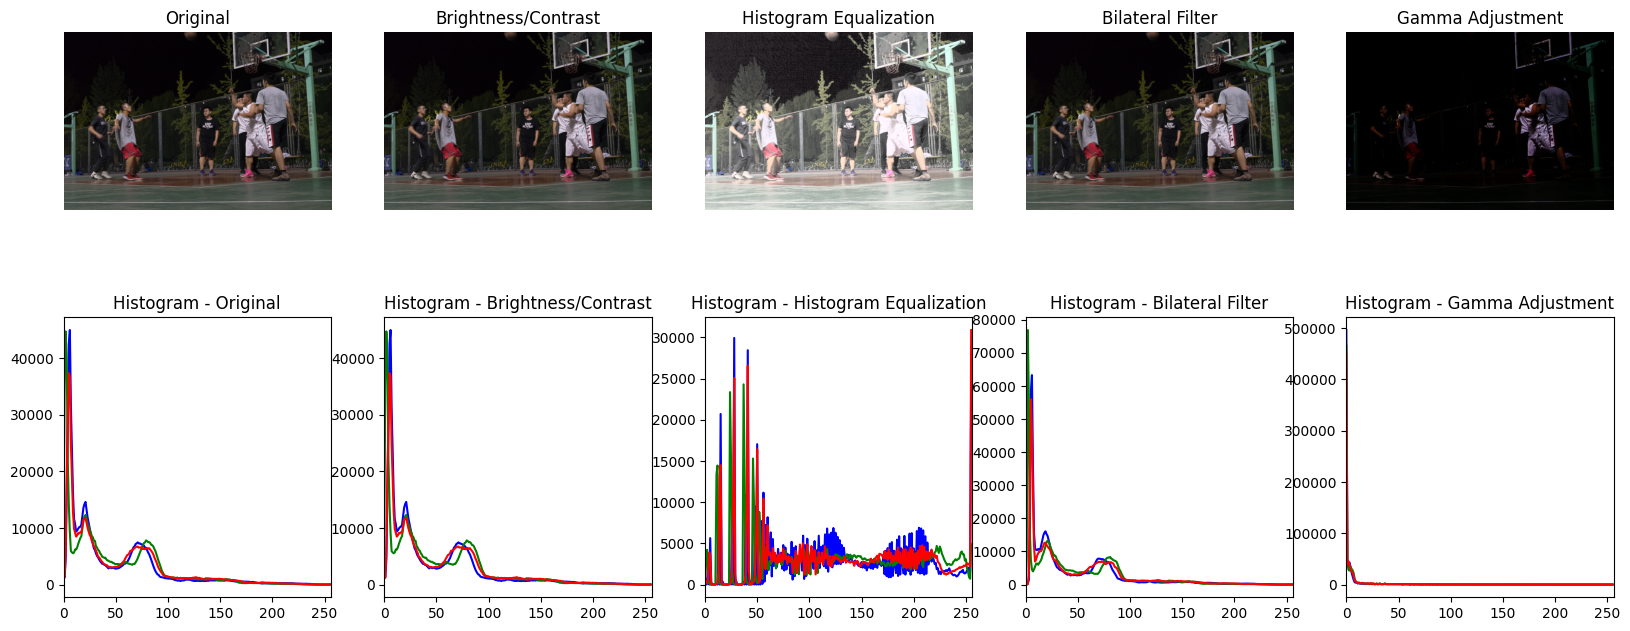

In [20]:
# Importar las librerías necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from IPython.display import display
from PIL import Image

# Función para calcular y mostrar histogramas
def plot_histogram(image, title):
    plt.figure()
    plt.title(title)
    plt.xlabel('Bins')
    plt.ylabel('# of Pixels')
    colors = ('b', 'g', 'r')
    for (i, col) in enumerate(colors):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
        plt.xlim([0, 256])
    plt.show()

# Función para mostrar imágenes en Colab en una fila
def show_images(images, titles):
    assert(len(images) == len(titles))
    n = len(images)
    fig, axs = plt.subplots(2, n, figsize=(20, 8))

    for i in range(n):
        axs[0, i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        axs[0, i].set_title(titles[i])
        axs[0, i].axis('off')

        # Mostrar el histograma en la fila inferior
        image = images[i]
        if len(image.shape) == 3 and image.shape[-1] == 3:
            for ch, color in enumerate(['b', 'g', 'r']):
                hist = cv2.calcHist([image], [ch], None, [256], [0, 256])
                axs[1, i].plot(hist, color=color)
        axs[1, i].set_xlim([0, 256])
        axs[1, i].set_title(f'Histogram - {titles[i]}')
    plt.show()

# Función para ajustar brillo y contraste
def apply_brightness_contrast(input_img, brightness=255, contrast=127):
    brightness -= 255
    contrast = contrast * 131 / 127 - 131

    img = input_img.copy()
    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow) / 255
        gamma_b = shadow
        img = cv2.addWeighted(img, alpha_b, img, 0, gamma_b)

    if contrast != 0:
        f = 131 * (contrast + 127) / (127 * (131 - contrast))
        alpha_c = f
        gamma_c = 127 * (1 - f)
        img = cv2.addWeighted(img, alpha_c, img, 0, gamma_c)

    return img

# Función para aplicar ecualización del histograma
def apply_hist_eq(input_img):
    img_yuv = cv2.cvtColor(input_img, cv2.COLOR_BGR2YUV)
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    hist_eq_image = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
    return hist_eq_image

# Función para aplicar filtro bilateral
def apply_bilateral_filter(input_img):
    bilateral_image = cv2.bilateralFilter(input_img, 5, 30, 30)
    return bilateral_image

# Función para ajustar gamma
def adjust_gamma(input_img, gamma=0.3):
    invGamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** invGamma * 255 for i in range(256)]).astype("uint8")
    gamma_image = cv2.LUT(input_img, table)
    return gamma_image

# Subir y procesar la imagen
uploaded = files.upload()
for filename in uploaded.keys():
    img = cv2.imread(filename)

    processed_images = []
    titles = []

    processed_images.append(img)
    titles.append("Original")

    bright_contrast_image = apply_brightness_contrast(img)
    hist_eq_image = apply_hist_eq(img)
    bilateral_image = apply_bilateral_filter(img)
    gamma_image = adjust_gamma(img)

    processed_images.extend([bright_contrast_image, hist_eq_image, bilateral_image, gamma_image])
    titles.extend(["Brightness/Contrast", "Histogram Equalization", "Bilateral Filter", "Gamma Adjustment"])

# Mostrar las imágenes originales y mejoradas en paralelo con sus histogramas
show_images(processed_images, titles)

Saving 1561.png to 1561 (7).png
Saving 1716.png to 1716 (8).png


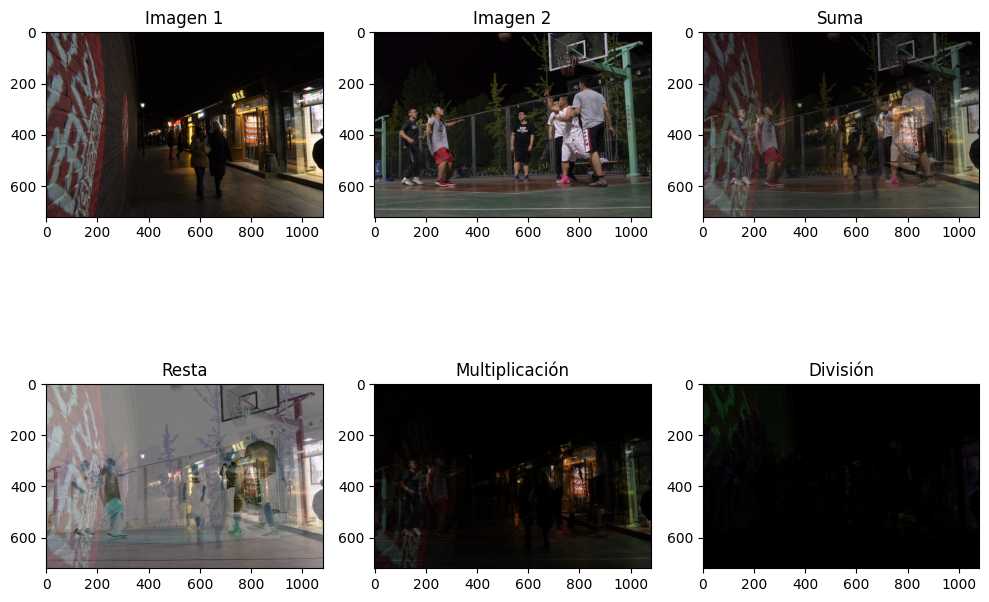

In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files
from PIL import Image
import io

# Función para cargar imágenes usando la biblioteca PIL
def upload_and_read_images():
    uploaded = files.upload()
    images = []
    for filename in uploaded.keys():
        img = Image.open(io.BytesIO(uploaded[filename]))
        img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
        images.append(img)
    return images

# Función para normalizar una imagen a [0, 1] para floats
def normalize_image_float(image):
    return cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

# Función para normalizar una imagen a [0, 255] para enteros
def normalize_image_uint8(image):
    return cv2.normalize(image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Cargar imágenes
images = upload_and_read_images()

if len(images) < 2:
    print("Solo se subió una imagen. Las operaciones algebraicas requieren dos imágenes.")
else:
    image1, image2 = images[:2]

    # Asegurarse de que ambas imágenes tienen el mismo tamaño
    if image1.shape != image2.shape:
        raise ValueError("Las imágenes deben tener el mismo tamaño y número de canales")

    # Convertir imágenes a float32
    image1 = image1.astype(np.float32)
    image2 = image2.astype(np.float32)

    # Operaciones algebraicas
    sum_image = cv2.add(image1, image2)
    sub_image = cv2.subtract(image1, image2)
    mul_image = cv2.multiply(image1, image2)
    div_image = cv2.divide(image1, image2 + np.ones_like(image2, dtype=np.float32), dtype=cv2.CV_32F)

    # Normalizar las imágenes resultantes para asegurar que están en el rango correcto para la visualización
    sum_image_normalized = normalize_image_float(sum_image)
    sub_image_normalized = normalize_image_float(sub_image)
    mul_image_normalized = normalize_image_float(mul_image)
    div_image_normalized = normalize_image_float(div_image)

    # Convertir BGR a RGB para visualización con Matplotlib
    image1_rgb = cv2.cvtColor(normalize_image_float(image1), cv2.COLOR_BGR2RGB)
    image2_rgb = cv2.cvtColor(normalize_image_float(image2), cv2.COLOR_BGR2RGB)
    sum_image_rgb = cv2.cvtColor(sum_image_normalized, cv2.COLOR_BGR2RGB)
    sub_image_rgb = cv2.cvtColor(sub_image_normalized, cv2.COLOR_BGR2RGB)
    mul_image_rgb = cv2.cvtColor(mul_image_normalized, cv2.COLOR_BGR2RGB)
    div_image_rgb = cv2.cvtColor(div_image_normalized, cv2.COLOR_BGR2RGB)

    # Visualización de las imágenes
    plt.figure(figsize=(10, 8))

    plt.subplot(231), plt.imshow(image1_rgb), plt.title('Imagen 1')
    plt.subplot(232), plt.imshow(image2_rgb), plt.title('Imagen 2')
    plt.subplot(233), plt.imshow(sum_image_rgb), plt.title('Suma')
    plt.subplot(234), plt.imshow(sub_image_rgb), plt.title('Resta')
    plt.subplot(235), plt.imshow(mul_image_rgb), plt.title('Multiplicación')
    plt.subplot(236), plt.imshow(div_image_rgb), plt.title('División')

    plt.tight_layout()
    plt.show()

Saving 1561.png to 1561 (8).png
Saving 1716.png to 1716 (9).png


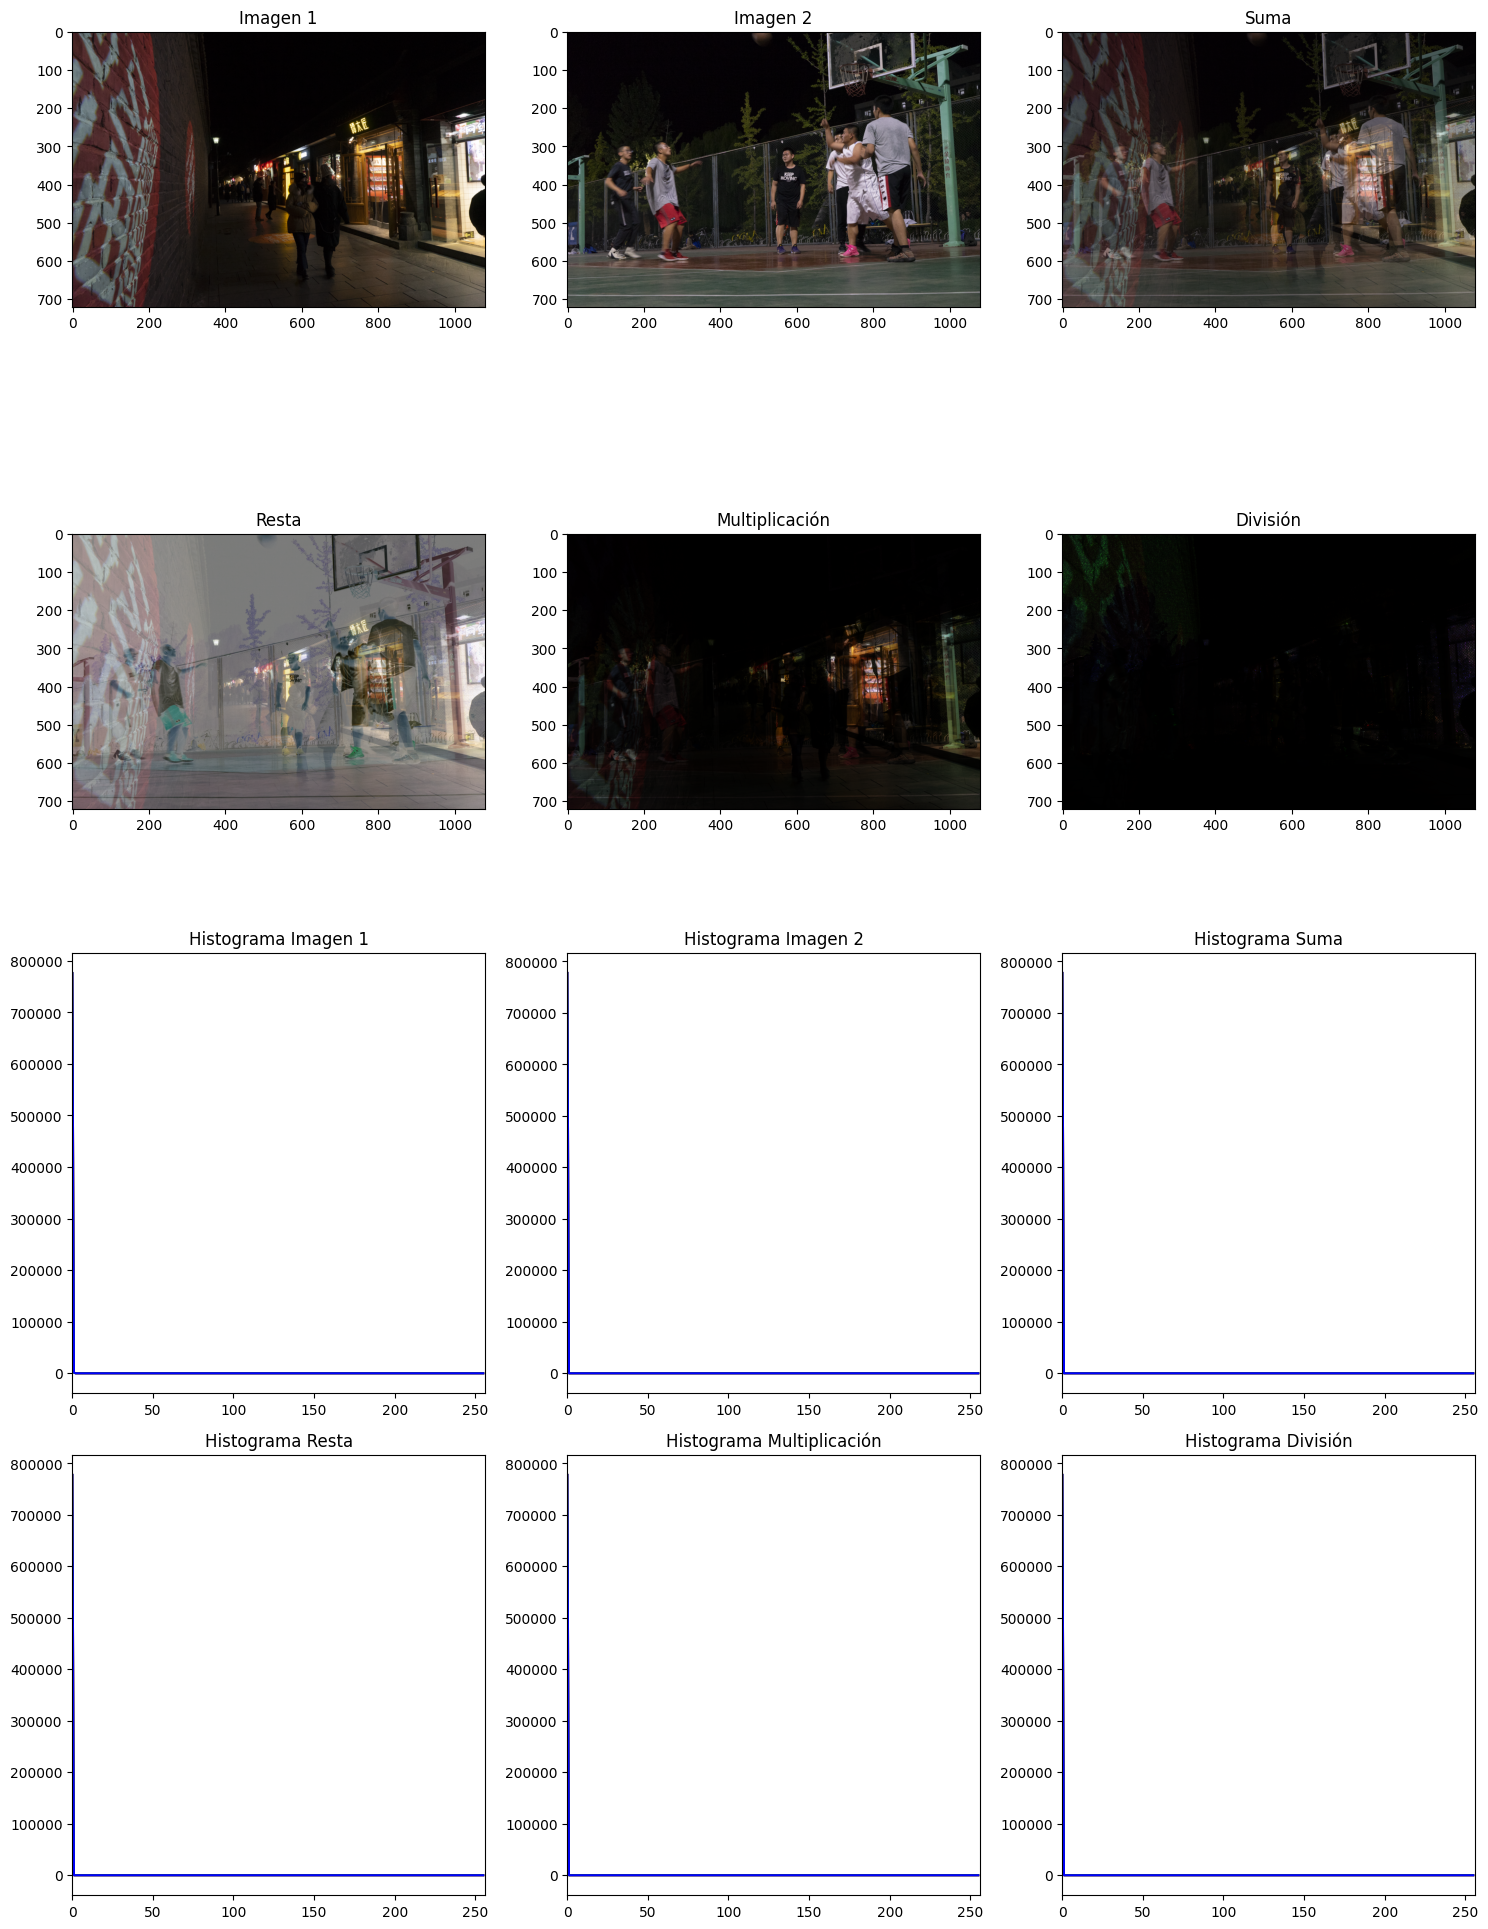

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files
from PIL import Image
import io

# Función para cargar imágenes usando la biblioteca PIL
def upload_and_read_images():
    uploaded = files.upload()
    images = []
    for filename in uploaded.keys():
        img = Image.open(io.BytesIO(uploaded[filename]))
        img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
        images.append(img)
    return images

# Función para normalizar una imagen a [0, 1] para floats
def normalize_image_float(image):
    return cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

# Función para normalizar una imagen a [0, 255] para enteros
def normalize_image_uint8(image):
    return cv2.normalize(image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Función para calcular y mostrar el histograma de una imagen
def plot_histogram(image, title):
    color = ('r','g','b')
    for i, col in enumerate(color):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color = col)
        plt.xlim([0, 256])
    plt.title(title)

# Cargar imágenes
images = upload_and_read_images()

if len(images) < 2:
    print("Solo se subió una imagen. Las operaciones algebraicas requieren dos imágenes.")
else:
    image1, image2 = images[:2]

    # Asegurarse de que ambas imágenes tienen el mismo tamaño
    if image1.shape != image2.shape:
        raise ValueError("Las imágenes deben tener el mismo tamaño y número de canales")

    # Convertir imágenes a float32
    image1 = image1.astype(np.float32)
    image2 = image2.astype(np.float32)

    # Operaciones algebraicas
    sum_image = cv2.add(image1, image2)
    sub_image = cv2.subtract(image1, image2)
    mul_image = cv2.multiply(image1, image2)
    div_image = cv2.divide(image1, image2 + np.ones_like(image2, dtype=np.float32), dtype=cv2.CV_32F)

    # Normalizar las imágenes resultantes para asegurar que están en el rango correcto para la visualización
    sum_image_normalized = normalize_image_float(sum_image)
    sub_image_normalized = normalize_image_float(sub_image)
    mul_image_normalized = normalize_image_float(mul_image)
    div_image_normalized = normalize_image_float(div_image)

    # Convertir BGR a RGB para visualización con Matplotlib
    image1_rgb = cv2.cvtColor(normalize_image_float(image1), cv2.COLOR_BGR2RGB)
    image2_rgb = cv2.cvtColor(normalize_image_float(image2), cv2.COLOR_BGR2RGB)
    sum_image_rgb = cv2.cvtColor(sum_image_normalized, cv2.COLOR_BGR2RGB)
    sub_image_rgb = cv2.cvtColor(sub_image_normalized, cv2.COLOR_BGR2RGB)
    mul_image_rgb = cv2.cvtColor(mul_image_normalized, cv2.COLOR_BGR2RGB)
    div_image_rgb = cv2.cvtColor(div_image_normalized, cv2.COLOR_BGR2RGB)

    # Visualización de las imágenes y sus histogramas
    plt.figure(figsize=(15, 20))

    plt.subplot(431), plt.imshow(image1_rgb), plt.title('Imagen 1')
    plt.subplot(432), plt.imshow(image2_rgb), plt.title('Imagen 2')
    plt.subplot(433), plt.imshow(sum_image_rgb), plt.title('Suma')
    plt.subplot(434), plt.imshow(sub_image_rgb), plt.title('Resta')
    plt.subplot(435), plt.imshow(mul_image_rgb), plt.title('Multiplicación')
    plt.subplot(436), plt.imshow(div_image_rgb), plt.title('División')

    plt.subplot(437), plot_histogram(image1_rgb, 'Histograma Imagen 1')
    plt.subplot(438), plot_histogram(image2_rgb, 'Histograma Imagen 2')
    plt.subplot(439), plot_histogram(sum_image_rgb, 'Histograma Suma')
    plt.subplot(4, 3, 10), plot_histogram(sub_image_rgb, 'Histograma Resta')
    plt.subplot(4, 3, 11), plot_histogram(mul_image_rgb, 'Histograma Multiplicación')
    plt.subplot(4, 3, 12), plot_histogram(div_image_rgb, 'Histograma División')

    plt.tight_layout()
    plt.show()

Saving 1472.png to 1472 (2).png


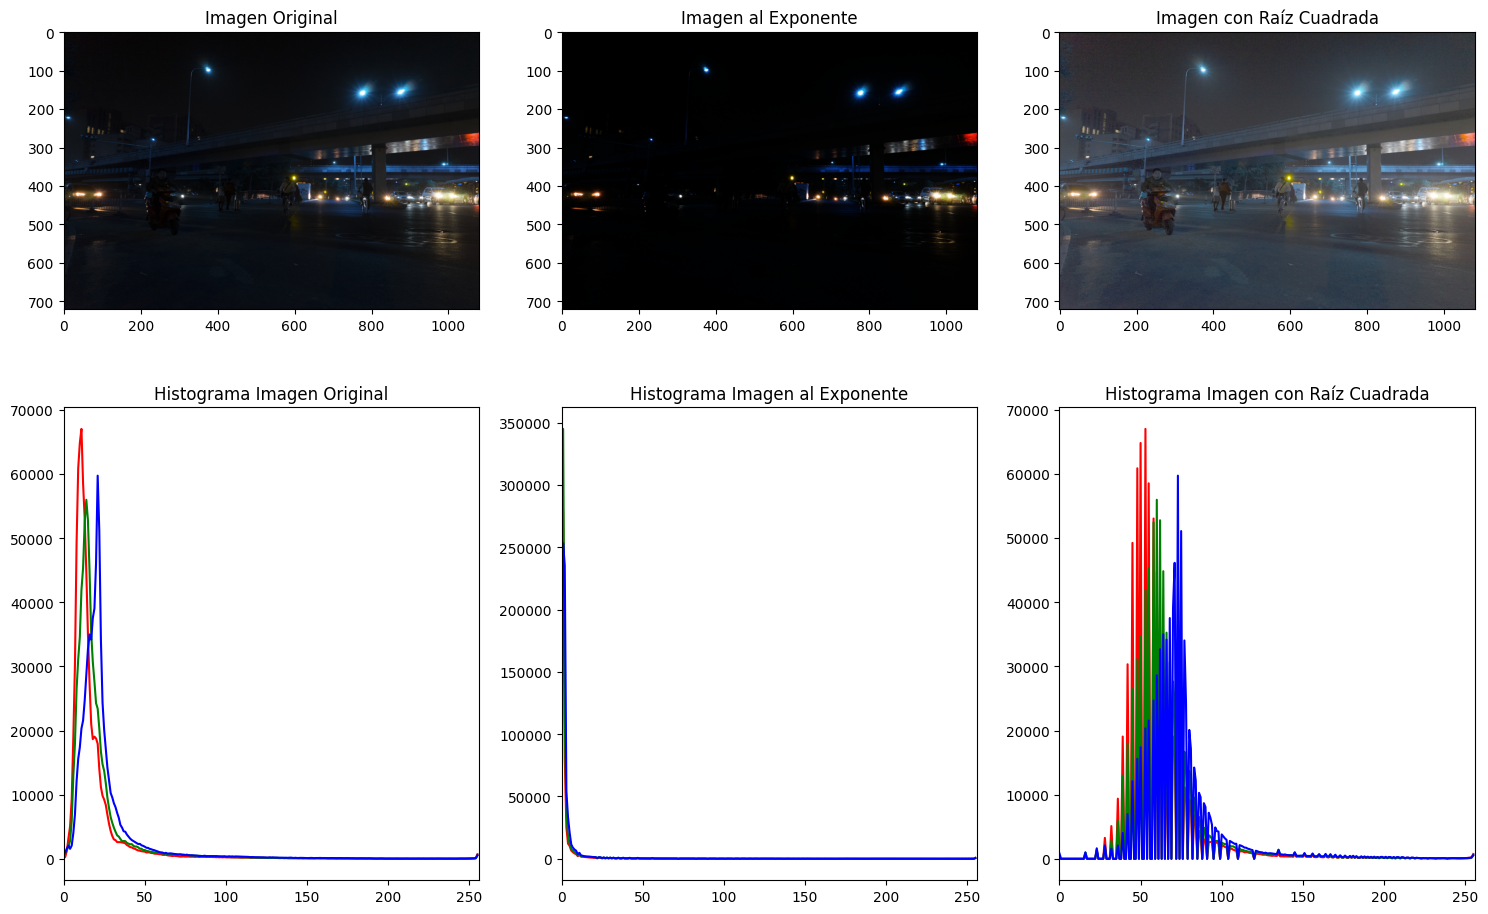

In [34]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files
from PIL import Image
import io

# Función para cargar una imagen usando la biblioteca PIL
def upload_and_read_image():
    uploaded = files.upload()
    for filename in uploaded.keys():
        image = Image.open(io.BytesIO(uploaded[filename]))
        return np.array(image)  # Convertir la imagen a una matriz de NumPy

def normalize_image_uint8(image):
    return cv2.normalize(image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Función para calcular y mostrar el histograma de una imagen
def plot_histogram(image, title):
    color = ('r', 'g', 'b')
    for i, col in enumerate(color):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
        plt.xlim([0, 256])
    plt.title(title)

# Cargar la imagen
image = upload_and_read_image()

# Convertir imagen a float32
image = image.astype(np.float32)

# Operaciones de potencia y raíz
exponent = 2  # Cambiar este valor si se desea elevar a un exponente diferente
power_image = cv2.pow(image, exponent)
sqrt_image = cv2.sqrt(image)

# Normalizar las imágenes resultantes para asegurar que están en el rango correcto para la visualización
power_image_normalized = normalize_image_uint8(power_image)
sqrt_image_normalized = normalize_image_uint8(sqrt_image)

# Convertir BGR a RGB para visualización con Matplotlib (si la imagen es en color)
if len(image.shape) == 3 and image.shape[2] == 3:  # Comprobar si la imagen es a color
    image_rgb = cv2.cvtColor(normalize_image_uint8(image), cv2.COLOR_BGR2RGB)
    power_image_rgb = cv2.cvtColor(power_image_normalized, cv2.COLOR_BGR2RGB)
    sqrt_image_rgb = cv2.cvtColor(sqrt_image_normalized, cv2.COLOR_BGR2RGB)
else:
    image_rgb = normalize_image_uint8(image)
    power_image_rgb = power_image_normalized
    sqrt_image_rgb = sqrt_image_normalized

# Visualización de las imágenes y sus histogramas en 2 filas y 3 columnas
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1), plt.imshow(image_rgb, cmap='gray' if len(image.shape) == 2 else None), plt.title('Imagen Original')
plt.subplot(2, 3, 2), plt.imshow(power_image_rgb, cmap='gray' if len(image.shape) == 2 else None), plt.title('Imagen al Exponente')
plt.subplot(2, 3, 3), plt.imshow(sqrt_image_rgb, cmap='gray' if len(image.shape) == 2 else None), plt.title('Imagen con Raíz Cuadrada')

plt.subplot(2, 3, 4), plot_histogram(image_rgb, 'Histograma Imagen Original')
plt.subplot(2, 3, 5), plot_histogram(power_image_rgb, 'Histograma Imagen al Exponente')
plt.subplot(2, 3, 6), plot_histogram(sqrt_image_rgb, 'Histograma Imagen con Raíz Cuadrada')

plt.tight_layout()
plt.show()

Saving 1561.png to 1561 (12).png
Saving 1716.png to 1716 (12).png


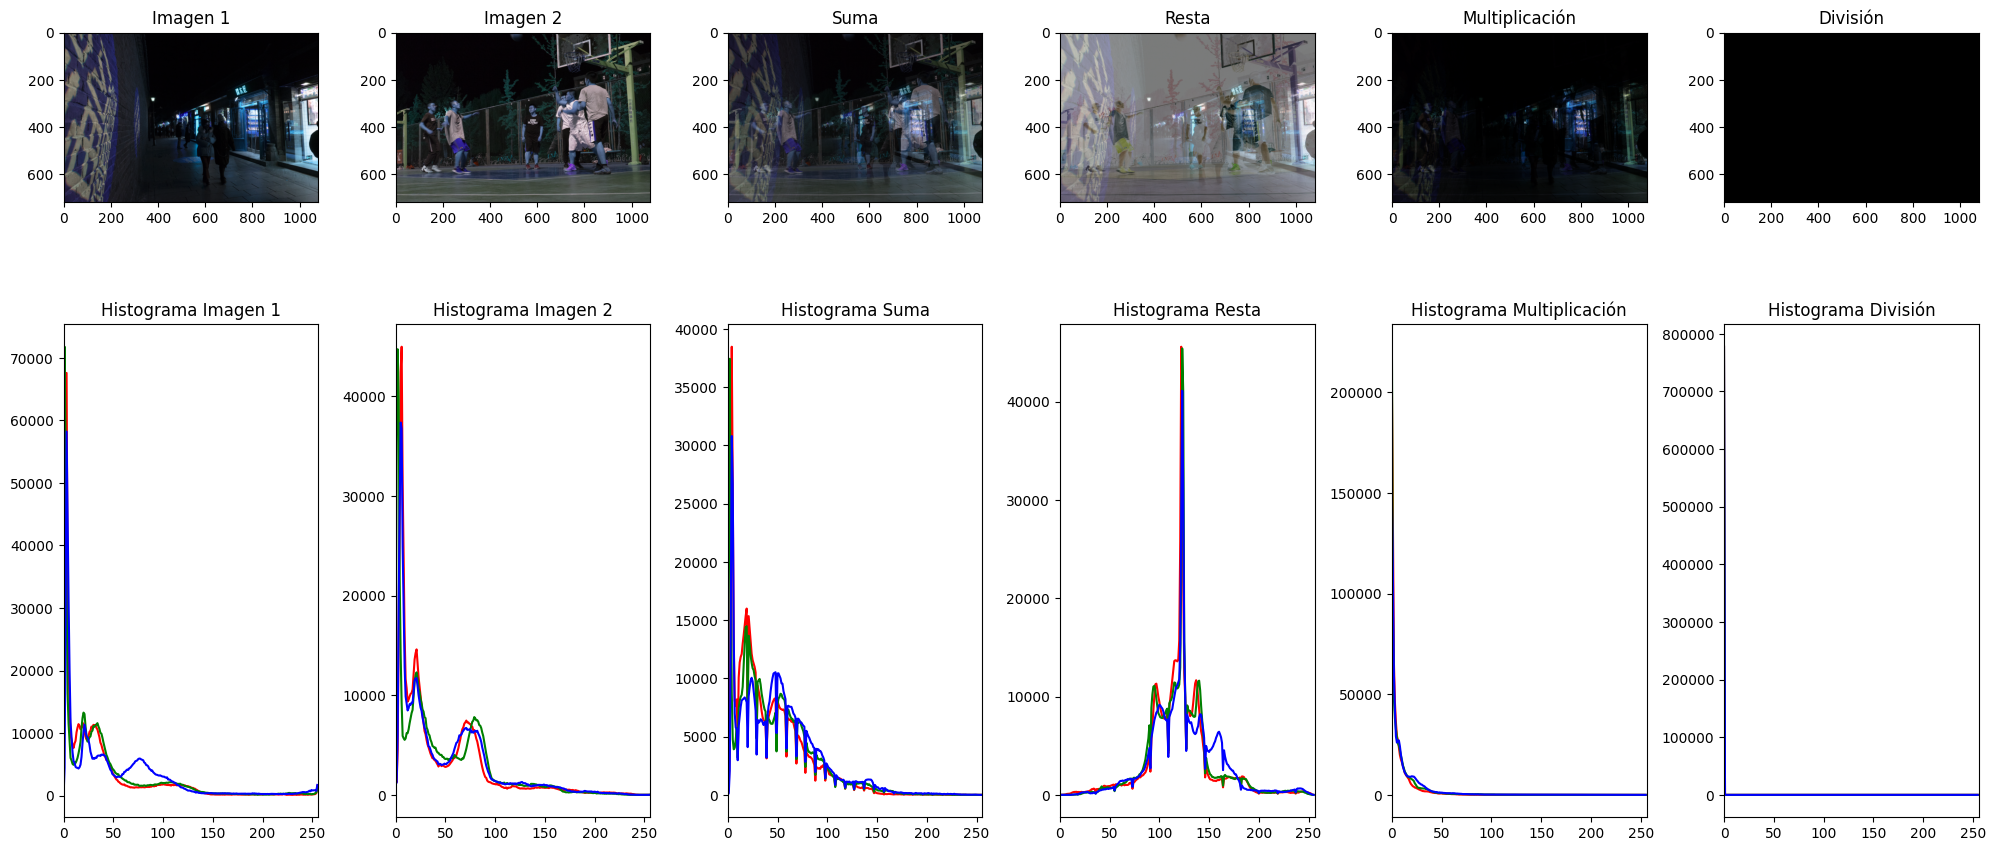

In [36]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files
from PIL import Image
import io

# Función para cargar imágenes usando la biblioteca PIL
def upload_and_read_images():
    uploaded = files.upload()
    images = []
    for filename in uploaded.keys():
        image = Image.open(io.BytesIO(uploaded[filename]))
        images.append(np.array(image))  # Convertir la imagen a una matriz de NumPy
    return images

def normalize_image_uint8(image):
    return cv2.normalize(image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Función para calcular y mostrar el histograma de una imagen
def plot_histogram(image, title):
    if len(image.shape) == 2:  # Imagen en escala de grises
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
        plt.plot(hist, color='k')  # Histograma en color negro
    else:
        color = ('r', 'g', 'b')
        for i, col in enumerate(color):
            hist = cv2.calcHist([image], [i], None, [256], [0, 256])
            plt.plot(hist, color=col)
            plt.xlim([0, 256])
    plt.title(title)

# Cargar imágenes
images = upload_and_read_images()
image1 = images[0]
image2 = images[1]

# Convertir imágenes a float32
image1 = image1.astype(np.float32)
image2 = image2.astype(np.float32)

# Operaciones aritméticas
sum_image = cv2.add(image1, image2)
sub_image = cv2.subtract(image1, image2)
mul_image = cv2.multiply(image1, image2)
div_image = cv2.divide(image1, image2)

# Normalizar las imágenes resultantes para asegurar que están en el rango correcto para la visualización
sum_image_normalized = normalize_image_uint8(sum_image)
sub_image_normalized = normalize_image_uint8(sub_image)
mul_image_normalized = normalize_image_uint8(mul_image)
div_image_normalized = normalize_image_uint8(div_image)

# Convertir BGR a RGB para visualización con Matplotlib (si la imagen es en color)
if len(image1.shape) == 3 and image1.shape[2] == 3:  # Comprobar si la imagen es a color
    image1_rgb = cv2.cvtColor(normalize_image_uint8(image1), cv2.COLOR_BGR2RGB)
    image2_rgb = cv2.cvtColor(normalize_image_uint8(image2), cv2.COLOR_BGR2RGB)
    sum_image_rgb = cv2.cvtColor(sum_image_normalized, cv2.COLOR_BGR2RGB)
    sub_image_rgb = cv2.cvtColor(sub_image_normalized, cv2.COLOR_BGR2RGB)
    mul_image_rgb = cv2.cvtColor(mul_image_normalized, cv2.COLOR_BGR2RGB)
    div_image_rgb = cv2.cvtColor(div_image_normalized, cv2.COLOR_BGR2RGB)
else:
    image1_rgb = normalize_image_uint8(image1)
    image2_rgb = normalize_image_uint8(image2)
    sum_image_rgb = sum_image_normalized
    sub_image_rgb = sub_image_normalized
    mul_image_rgb = mul_image_normalized
    div_image_rgb = div_image_normalized

# Visualización de las imágenes y sus histogramas en 2 filas y 6 columnas
plt.figure(figsize=(20, 10))

plt.subplot(2, 6, 1), plt.imshow(image1_rgb, cmap='gray' if len(image1.shape) == 2 else None), plt.title('Imagen 1')
plt.subplot(2, 6, 2), plt.imshow(image2_rgb, cmap='gray' if len(image2.shape) == 2 else None), plt.title('Imagen 2')
plt.subplot(2, 6, 3), plt.imshow(sum_image_rgb, cmap='gray' if len(image1.shape) == 2 else None), plt.title('Suma')
plt.subplot(2, 6, 4), plt.imshow(sub_image_rgb, cmap='gray' if len(image1.shape) == 2 else None), plt.title('Resta')
plt.subplot(2, 6, 5), plt.imshow(mul_image_rgb, cmap='gray' if len(image1.shape) == 2 else None), plt.title('Multiplicación')
plt.subplot(2, 6, 6), plt.imshow(div_image_rgb, cmap='gray' if len(image1.shape) == 2 else None), plt.title('División')

plt.subplot(2, 6, 7), plot_histogram(image1_rgb, 'Histograma Imagen 1')
plt.subplot(2, 6, 8), plot_histogram(image2_rgb, 'Histograma Imagen 2')
plt.subplot(2, 6, 9), plot_histogram(sum_image_rgb, 'Histograma Suma')
plt.subplot(2, 6, 10), plot_histogram(sub_image_rgb, 'Histograma Resta')
plt.subplot(2, 6, 11), plot_histogram(mul_image_rgb, 'Histograma Multiplicación')
plt.subplot(2, 6, 12), plot_histogram(div_image_rgb, 'Histograma División')

plt.tight_layout()
plt.show()